# Insert Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Import Dataset

In [6]:
df=pd.read_csv('covid_19_india.csv')
df.head(5)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [7]:
df.shape

(14402, 9)

In [8]:
df.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

# Sort the column as per need

In [9]:
df=df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']] ## we take only those columns,which is relative to our prediction
df.columns=['date','state','cured','death','confirm'] #decapitalizing columns for better handling

In [10]:
df.head(10) #check 10 rows

,date,state,cured,death,confirm
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [11]:
df.tail() #check last 5 row

,date,state,cured,death,confirm
14397,2021-04-30,Telangana,355618,2261,435606
14398,2021-04-30,Tripura,33612,396,35169
14399,2021-04-30,Uttarakhand,124046,2502,174867
14400,2021-04-30,Uttar Pradesh,896477,12238,1217952
14401,2021-04-30,West Bengal,689466,11248,810955


In [12]:
today=df[df.date=='2021-04-30'] #here we are taking latest data for our analysis purpose

In [13]:
today.head(10)

,date,state,cured,death,confirm
14366,2021-04-30,Andaman and Nicobar Islands,5643,67,5875
14367,2021-04-30,Andhra Pradesh,962250,7928,1084336
14368,2021-04-30,Arunachal Pradesh,17085,59,18256
14369,2021-04-30,Assam,224194,1281,249926
14370,2021-04-30,Bihar,351162,2480,454464
14371,2021-04-30,Chandigarh,34806,465,41923
14372,2021-04-30,Chhattisgarh,587484,8312,713706
14373,2021-04-30,Dadra and Nagar Haveli and Daman and Diu,5249,4,7334
14374,2021-04-30,Delhi,1008537,15772,1122286
14375,2021-04-30,Goa,65984,1146,88028


In [14]:
today.shape #as we can see we have 36 current records of 30th April,2021

(36, 5)

# Analysing covid cases

In [15]:
max_confirm=today.sort_values(by='confirm',ascending=False) #here we try to extract those state which have maximum confirm cases

In [16]:
max_confirm.head(15)

,date,state,cured,death,confirm
14386,2021-04-30,Maharashtra,3799266,67985,4539553
14382,2021-04-30,Kerala,1244301,5259,1533984
14381,2021-04-30,Karnataka,1110025,15306,1474846
14400,2021-04-30,Uttar Pradesh,896477,12238,1217952
14396,2021-04-30,Tamil Nadu,1021575,13933,1148064
14374,2021-04-30,Delhi,1008537,15772,1122286
14367,2021-04-30,Andhra Pradesh,962250,7928,1084336
14401,2021-04-30,West Bengal,689466,11248,810955
14372,2021-04-30,Chhattisgarh,587484,8312,713706
14394,2021-04-30,Rajasthan,407243,4084,580846


In [17]:
max_confirm_state=max_confirm[0:10] #here we extract only top 10 covid confirmed state of india

In [18]:
max_confirm_state.head()

,date,state,cured,death,confirm
14386,2021-04-30,Maharashtra,3799266,67985,4539553
14382,2021-04-30,Kerala,1244301,5259,1533984
14381,2021-04-30,Karnataka,1110025,15306,1474846
14400,2021-04-30,Uttar Pradesh,896477,12238,1217952
14396,2021-04-30,Tamil Nadu,1021575,13933,1148064


# Visualize state vs max confirm cases

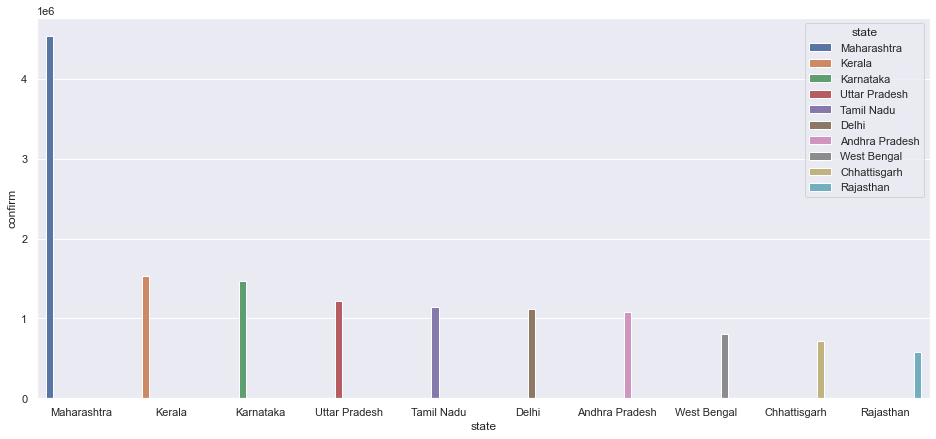

In [19]:
sns.set(rc={'figure.figsize':(16,7)})
sns.barplot(x="state",y="confirm",data=max_confirm_state,hue="state") #hue is used to color the state plots
plt.show()

We can see the confirmed case in Maharashtra is higher than other states.From kerala the confirmed case is decreased by 1/4th. Kerala an karnataka have almost similar number of confirmed case.

# Visualize state vs max death case

In [20]:
max_death_state=today.sort_values(by='death',ascending=False)
max_death_state=max_death_state[0:10] #extract 10 rows

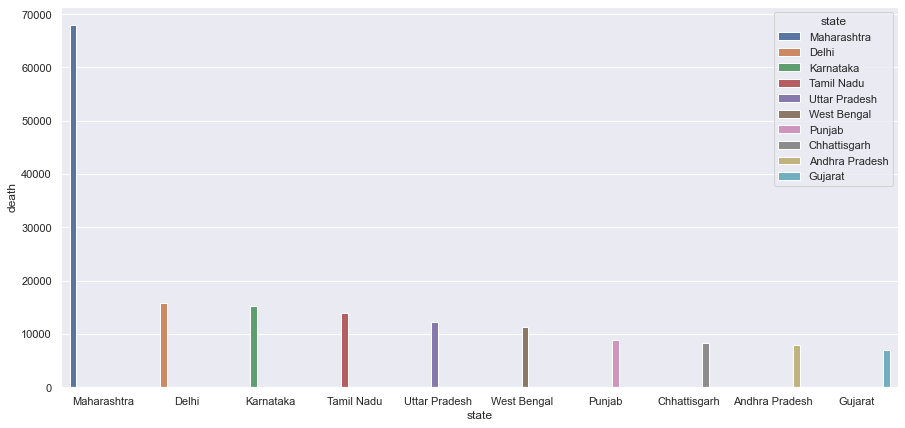

In [21]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x='state',y='death',data=max_death_state,hue='state')
plt.show()

1.The death cases and confirmed cases of Maharashtra are higher than the rest of the state.

2.We can see Kerala is 3rd in confirm case,but kerala is not present in top 10 dearth cases. It can be due to people in kerala are more causious about covid-19 and maintain all guidelines or it can be covid-19 strain kerala is not so much effected in kerala

3.Delhi is the 6th most covid-19 confirmed state and has 2nd most death rate by covid-19.

4.West Bengal has more death case than confirmed cases.

5.Rajasthan and Kerala are not in top 10 death case list.

# Visualize state vs cured cases

In [22]:
max_state_cure=today.sort_values(by='cured',ascending=False) #extract only high cure cases
max_state_cure=max_state_cure[0:10] # extract top 10 cure cases
max_state_cure.head()

,date,state,cured,death,confirm
14386,2021-04-30,Maharashtra,3799266,67985,4539553
14382,2021-04-30,Kerala,1244301,5259,1533984
14381,2021-04-30,Karnataka,1110025,15306,1474846
14396,2021-04-30,Tamil Nadu,1021575,13933,1148064
14374,2021-04-30,Delhi,1008537,15772,1122286


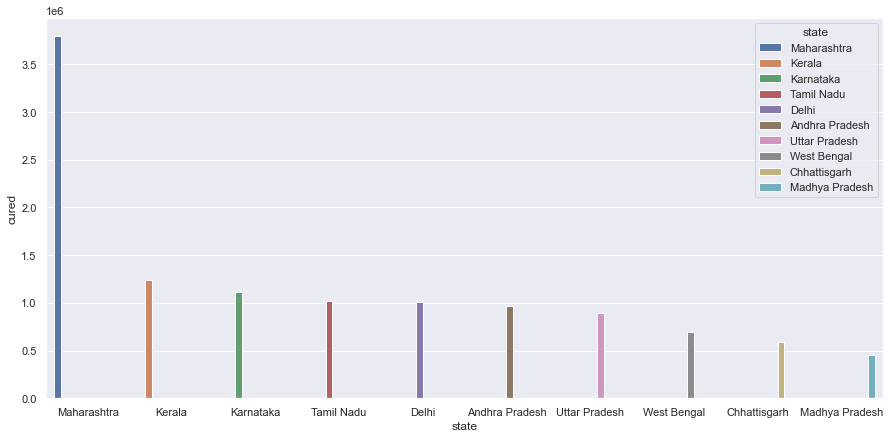

In [23]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x='state',y='cured',data=max_state_cure,hue='state')
plt.show()

1.Maharashtra is in the top position in death case,confirm case and cure case

2.Kerala is in 2nd position in confirmed cases.But,it is also 2nd in cured cases. It is also not in top 10 death cases list.

3.Madhya Pradesh has 10th position in cured case list. It does not in top 10 confirm or death case.So,we can say this state has better situation

# State-wise analysis of cases

In [24]:
#maharashtra

In [25]:
maharashtra=df[df.state=='Maharashtra'] #extract all the information about Mahrashtra
maharashtra.head()

,date,state,cured,death,confirm
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14


In [26]:
maharashtra.shape

(418, 5)

In [27]:
#kerala

In [28]:
kerala=df[df.state=='Kerala']
kerala.head()

,date,state,cured,death,confirm
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


We can see that Maharashta first launched confirm case on 9th march which was almost 1 month later of 1st case in kerala. After that Maharashtra cross Kerala and other state in confirm cases

In [29]:
maharashtra.tail()

,date,state,cured,death,confirm
14242,2021-04-26,Maharashtra,3530060,64760,4295027
14278,2021-04-27,Maharashtra,3601796,65284,4343727
14314,2021-04-28,Maharashtra,3669548,66179,4410085
14350,2021-04-29,Maharashtra,3730729,67214,4473394
14386,2021-04-30,Maharashtra,3799266,67985,4539553


we can see in 1 year Maharshtra cases is increased from 1 to total 45 lakh cases. Also from 26th april,2021 we can see almost 6o thousands new cases are increased per day.

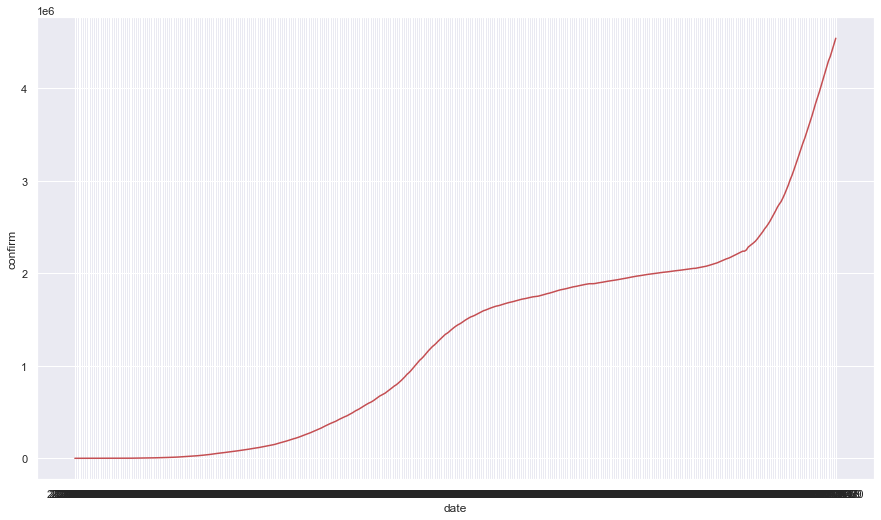

In [30]:
sns.set(rc={'figure.figsize':(15,8.5)})
sns.lineplot(x='date',y='confirm',data=maharashtra,color='r')
plt.show()

<AxesSubplot:xlabel='date'>

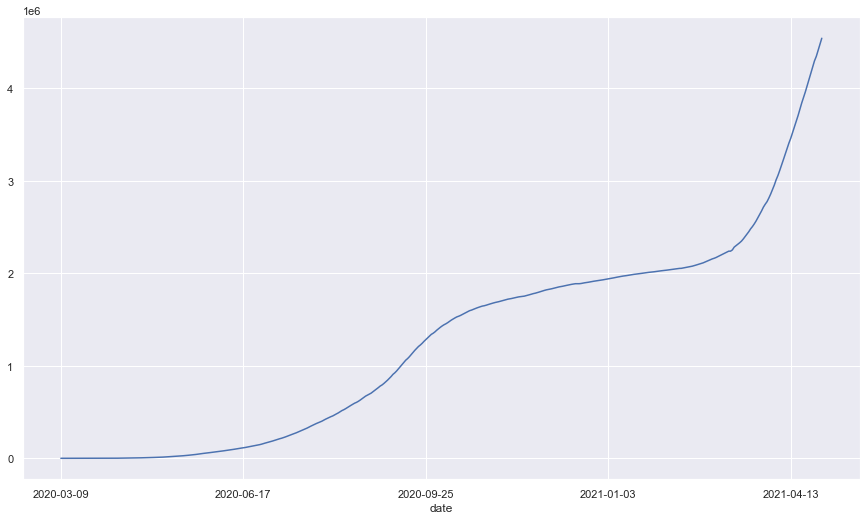

In [31]:
maharashtra.groupby("date")["confirm"].sum().plot()

<AxesSubplot:xlabel='date'>

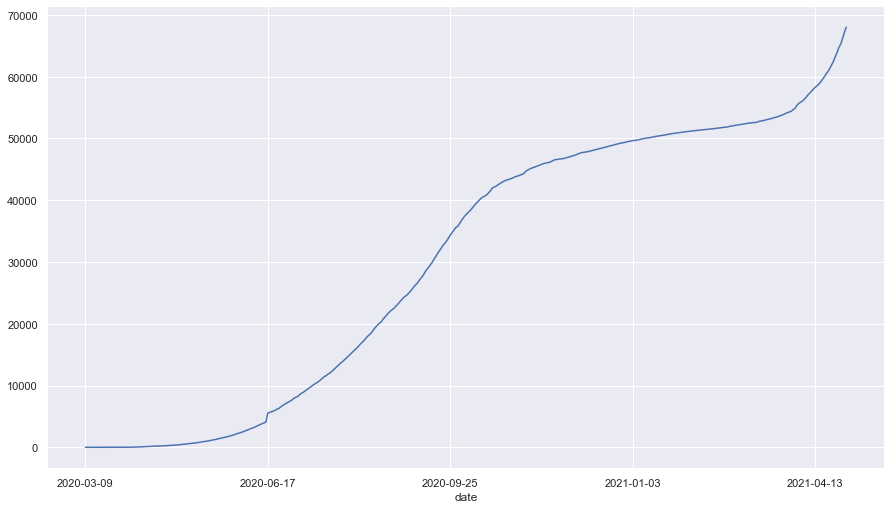

In [32]:
maharashtra.groupby("date")["death"].sum().plot() #groupby(y)(x)

In [33]:
#kerala

In [34]:
kerala.tail()

,date,state,cured,death,confirm
14238,2021-04-26,Kerala,1181324,5110,1405655
14274,2021-04-27,Kerala,1189267,5138,1427545
14310,2021-04-28,Kerala,1207680,5170,1460364
14346,2021-04-29,Kerala,1223185,5211,1495377
14382,2021-04-30,Kerala,1244301,5259,1533984


In [35]:
kerala.head()

,date,state,cured,death,confirm
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


<AxesSubplot:xlabel='date'>

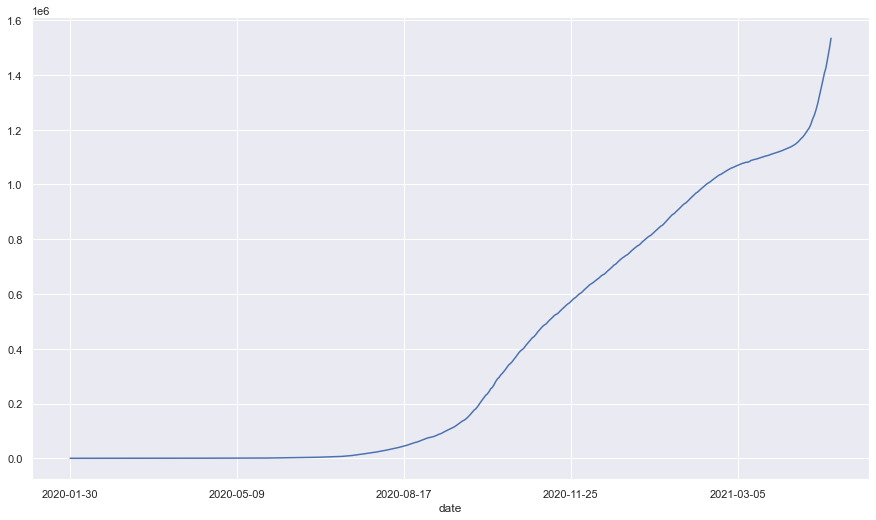

In [36]:
df[df["state"]=="Kerala"].groupby("date")["confirm"].sum().plot()

<AxesSubplot:xlabel='date'>

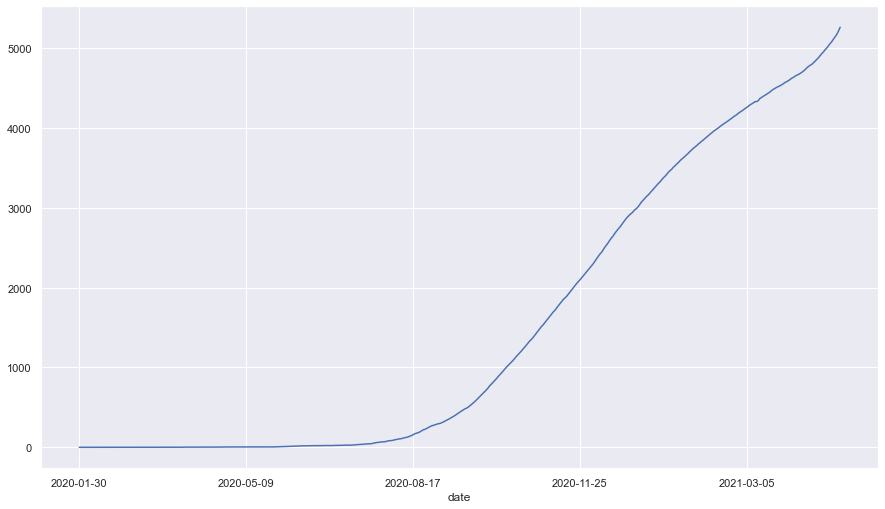

In [37]:
df[df["state"]=="Kerala"].groupby("date")["death"].sum().plot()

In [38]:
#West Bengal

<AxesSubplot:xlabel='date'>

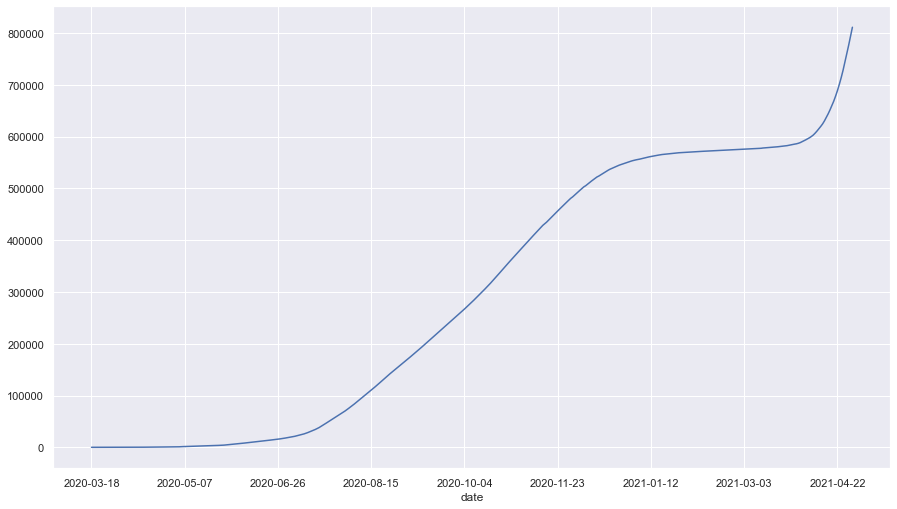

In [39]:
df[df['state']=="West Bengal"].groupby('date')['confirm'].sum().plot()

<AxesSubplot:xlabel='date'>

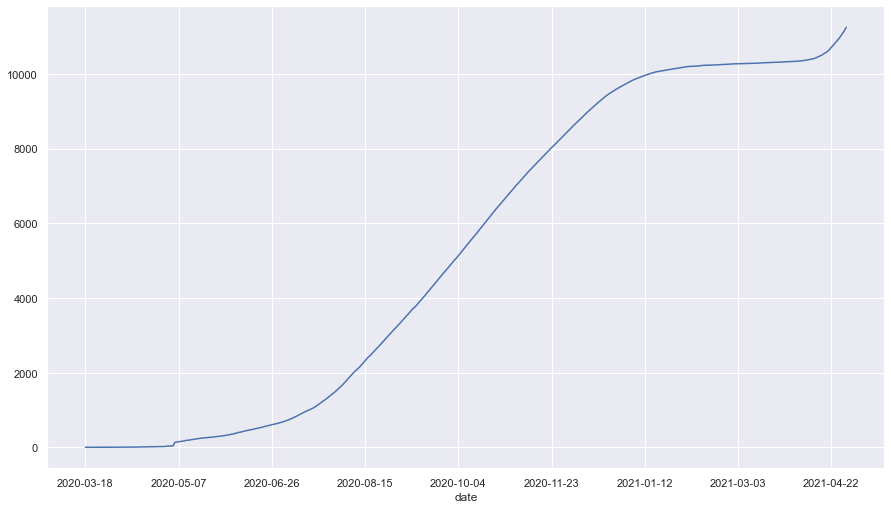

In [40]:
df[df['state']=="West Bengal"].groupby('date')['death'].sum().plot()

# StatewiseTestingDetails

In [41]:
test=pd.read_csv('StatewiseTestingDetails.csv')

In [42]:
test.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [43]:
test.tail()

,Date,State,TotalSamples,Negative,Positive
12740,2021-04-25,West Bengal,10166796.0,NaN,NaN
12741,2021-04-26,West Bengal,10215358.0,NaN,NaN
12742,2021-04-27,West Bengal,10270645.0,NaN,NaN
12743,2021-04-28,West Bengal,10325581.0,NaN,NaN
12744,2021-04-29,West Bengal,10379305.0,NaN,NaN


In [44]:
test.dtypes

Date             object
State            object
TotalSamples    float64
Negative         object
Positive        float64
dtype: object

In [45]:
maharashtra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 76 to 14386
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     418 non-null    object
 1   state    418 non-null    object
 2   cured    418 non-null    int64 
 3   death    418 non-null    int64 
 4   confirm  418 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 19.6+ KB


In [46]:
maharashtra['date'] = pd.to_datetime(maharashtra.date)

<ipython-input-46-c68210261fe6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maharashtra['date'] = pd.to_datetime(maharashtra.date)


In [47]:
import datetime as dt
maharashtra['date']=maharashtra['date'].map(dt.datetime.toordinal)

<ipython-input-47-9c5add1301fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maharashtra['date']=maharashtra['date'].map(dt.datetime.toordinal)


In [48]:
maharashtra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 76 to 14386
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     418 non-null    int64 
 1   state    418 non-null    object
 2   cured    418 non-null    int64 
 3   death    418 non-null    int64 
 4   confirm  418 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.6+ KB


In [49]:
maharashtra.head()

,date,state,cured,death,confirm
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [50]:
df.dtypes

date       object
state      object
cured       int64
death       int64
confirm     int64
dtype: object

# Prediction of Cases

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x=maharashtra['date']

In [63]:
y=maharashtra['confirm']

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [69]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

In [73]:
reg.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1)) #Here we used x as  feature parameter and y as your predictor. But our feature parameter and predictor should not be 1D. So check shape of x and y if it is 1D, then convert it from 1D to 2D.

<ipython-input-73-603fd3c66ec7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1)) #Here we used x as  feature parameter and y as your predictor. But our feature parameter and predictor should not be 1D. So check shape of x and y if it is 1D, then convert it from 1D to 2D.


RandomForestRegressor()

In [81]:
y_pred=reg.predict([[737498]])
print(y_pred)

[14.87]


we can see at 1st march 2021 in maharashtra the confirm cases can increased from 14 to 14.87